# Airbnb NYC Listings Data Analysis

![Airbnb](New_York_city_.png)

<b>Context</b>

Analysis of a public Airbnb dataset from Kaggle: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Dataset describes the Airbnb listing activity and metrics in NYC, NY for 2019. It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [49]:
import numpy as np
import pandas as pd

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [107]:
%matplotlib inline

In [108]:
nyc_df = pd.read_csv('AB_NYC_2019.csv')

In [109]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Based on the raw data provided we can explore the following questions:
- Which neighbourhoods are the most/least expensive?
- What is the average price for listings in each listing?
- Which neighbourhoods are the most/least reviewed?
- What types of rooms are most popular?

# Data Cleaning and Preparation

In this stage the data is checked for accuracy and completeness prior to beginning the analysis. 

- Removing extraneous data and outliers.
- Filling in missing values.
- Conforming data to a standardized pattern.
- Identifying errors revealed when new variables are created.
- Deleting data that cannot be corrected.

# Checking for missing values

In [110]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The name, host_name, last_review and reviews_per_month columns have missing values.   

The missing values originate from a variety of reasons:

- The host or person inputting data may have forgotten to enter the value.
- Hardware or software error during the collection is affecting accuracy of trip data and so on.

Additionally, it is recommended to make the above values a required field for listing data collection purposes to avoid missing data in the future.

# Identifying and Replacing Missing Values

In [111]:
##Rows with missing value for last_review

nyc_df['name'].isnull().value_counts() 

False    48879
True        16
Name: name, dtype: int64

In [112]:
##Rows with missing value for last_review

nyc_df['host_name'].isnull().value_counts() 

False    48874
True        21
Name: host_name, dtype: int64

In [113]:
##Rows with missing value for last_review

nyc_df['last_review'].isnull().value_counts() 

False    38843
True     10052
Name: last_review, dtype: int64

In [114]:
##Rows with missing value for reviews_per_month

nyc_df['reviews_per_month'].isnull().value_counts() 

False    38843
True     10052
Name: reviews_per_month, dtype: int64

The majority of the missing data is from the "last_review" and "reviews_per_month" columns. Since the other two columns only have relatively few missing values we can just delete the associated rows. 

### Replacing Missing Values

The reviews_per_month and last_review values are connected to each other. The missing values represent the fact that a review has not been left for that listing. 

- The reviews_per_month will be replaced with a score of 0.0.
- The last_review will be set to "2019-12-31" to indicate there has been no review as of the last day of the year.

In [115]:
#Replacing missing values
nyc_df['reviews_per_month'] = nyc_df['reviews_per_month'].fillna(0.0)

In [116]:
## We have replaced all the missing reviews_per_month with a 0.0

nyc_df['reviews_per_month'].isnull().value_counts() 

False    48895
Name: reviews_per_month, dtype: int64

In [117]:
#Replacing missing values
nyc_df['last_review'] = nyc_df['last_review'].fillna("2019-12-31")

In [118]:
##Rows with missing value for last_review

nyc_df['last_review'].isnull().value_counts() 

False    48895
Name: last_review, dtype: int64

### Deleting Missing Values

In [119]:
#Deleting rows with missing name values
nyc_df.dropna(subset=['name'], inplace=True)

In [120]:
#Deleting rows with missing 'host_name' values
nyc_df.dropna(subset=['host_name'], inplace=True)

In [121]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

All missing values have been dealt with.

## Correcting formatting issues in data

In [122]:
#Converting last_review to datetime values 
nyc_df['last_review'] = pd.to_datetime(nyc_df['last_review'])

In [123]:
#Converting host_id to string
nyc_df['host_id'] = nyc_df['host_id'].astype(str)

## Creating new features

In this stage we are adding new features that will provide more insight into the data.

### Month

In [124]:
#Identifying which month the review was left

nyc_df['month'] = nyc_df['last_review'].apply(lambda time: time.month)

In [125]:
#We needs to convert the values in the Month column from numbers to names of Months

dmap = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [126]:
#Mapping our new dictionary to the Month column in the Dataframe

nyc_df['month'] = nyc_df['month'].map(dmap)

### Listing Coordinates

<b>'listing_coordinate'</b> is the latitude and longitude pair for each listing that can be used to calculate distances to other points.

In [127]:
#Creating a dataframe for latitude and longitude of each listing
locations_df = nyc_df[["latitude","longitude"]]

#Creating a list of tuples
locations_df = locations_df.to_records(index=False)

#There is now a column 'locations' with the latitude and longitude pair for each listing. Example, 
nyc_df['listing_coordinates'] = list(locations_df) 

### Major Attactions and Major Attraction Coordinates

The neighbourhood groups represent the boroughs of New York City. As people use Airbnb for short visits primarily it is useful to know how far  listings are from popular locations in each borough like Central Park in Manhattan.

In [128]:
#Identifying unique neighbourhoods groups (boroughs)
nyc_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Major Attraction in Each Neighbourhoods Group (Borough)
- Brooklyn: Brooklyn Bridge
- Manhattan: Central Park
- Queens: Citi Field  
- Staten Island: St. George's Ferry Terminal (Staten Island Ferry)
- Bronx: Bronx Zoo

In [129]:
#Coordinates of Major Attractions

brooklyn_bridge = (40.706001,-73.997002)
central_park = (40.769361,-73.977655)
citi_field = (40.75416365,-73.84082997)
staten_island_ferry = (40.643333,-74.074167) 
bronx_zoo = (40.852905,-73.872971)

#Creating a dictionary with the values in the neighbourhood group column to the names of the related attraction
dmap_locations = {'Brooklyn':"Brooklyn Bridge", 'Manhattan':"Central Park", 'Queens':"Citi Field", 'Staten Island':"St. Georges Ferry Terminal", 'Bronx':"Bronx Zoo"}

#Creating a dictionary with the values in the neighbourhood group column to the coordinates of the related attraction
dmap_coordinates = {'Brooklyn':brooklyn_bridge, 'Manhattan':central_park, 'Queens':citi_field, 'Staten Island':staten_island_ferry, 'Bronx':bronx_zoo}

#Mapping our new dictionary to the neighbourhood_group column in the Dataframe
nyc_df['major_attraction_location'] = nyc_df['neighbourhood_group'].map(dmap_locations)

#Mapping our new dictionary to the neighbourhood_group column in the Dataframe
nyc_df['major_attraction_coordinates'] = nyc_df['neighbourhood_group'].map(dmap_coordinates)


### Distance to Major Attactions

In [130]:
import haversine
from haversine import haversine, Unit

#haversine can calculate the distance (in various units) between two points on Earth using their latitude and longitude.


# We use the lambda function to apply haversine to calculate the distance to central park from each listing in Miles
# The default units for haversine are Km but we have set it to Miles here
# x.listing_coordinates and x.major_attraction_coordinates represent the coordinates of the listing location and the major attraction
nyc_df['distance_to_major_attractions'] = nyc_df.apply(lambda x: haversine(x.listing_coordinates,x.major_attraction_coordinates,unit=Unit.MILES), axis = 1)

#Rounding the values for readability
nyc_df['distance_to_major_attractions'] = nyc_df['distance_to_major_attractions'].round(2)


# Data Analysis and Visualization

In this stage, we will examine the data to identify any patterns, trends and relationships between the variables. It will help us analyze the data and extract insights that can be used to make decisions.

Data Visualization will give us a clear idea of what the data means by giving it visual context.

## Checking for any correlation in the data

<AxesSubplot:>

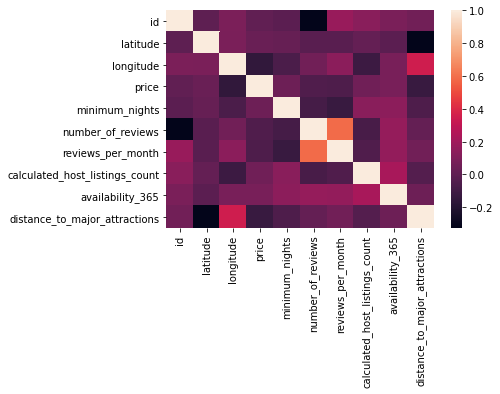

In [131]:
sns.heatmap(nyc_df.corr())

There does not appear to be any significant correlation between variables

## Host ID

In [132]:
nyc_df['host_id'].describe()

count         48858
unique        37425
top       219517861
freq            327
Name: host_id, dtype: object

There are <b>37425</b> unique hosts with host <b>219517861</b> having the most listings (327).

In [133]:
nyc_df[nyc_df['host_id'] == '219517861'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month,listing_coordinates,major_attraction_location,major_attraction_coordinates,distance_to_major_attractions
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,...,0,2019-12-31,0.00,327,309,December,"[40.70637, -74.00645]",Central Park,"(40.769361, -73.977655)",4.61
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,...,1,2019-05-29,0.73,327,219,May,"[40.70771, -74.00641]",Central Park,"(40.769361, -73.977655)",4.52
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,...,1,2019-05-21,0.60,327,159,May,"[40.70743, -74.00443]",Central Park,"(40.769361, -73.977655)",4.50
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,...,8,2019-06-09,1.86,327,91,June,"[40.74792, -73.97614]",Central Park,"(40.769361, -73.977655)",1.48
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,...,14,2019-06-10,2.59,327,81,June,"[40.74771, -73.97528]",Central Park,"(40.769361, -73.977655)",1.50


The top host <i>(219517861)</i>  is <b>Sonder (NYC)</b>

## Neighbourhood 

In [134]:
nyc_df['neighbourhood'].describe()

count            48858
unique             221
top       Williamsburg
freq              3917
Name: neighbourhood, dtype: object

There are <b>221</b> neighbourhoods with <b>Williamsburg</b> having the most listings (3917). 

### Top 10 Neighbourhoods with the Most Listings

In [135]:
nyc_df['neighbourhood'].value_counts().head(10)

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Hell's Kitchen        1954
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: neighbourhood, dtype: int64

In [136]:
#Calulating the total number of listings that the top 10 neighbourhoods account for
nyc_df['neighbourhood'].value_counts().head(10).sum()

23427

In [137]:
round((23427/48858)*100,2)

47.95

The top 10 neighbourhoods represent about <b>47.95%</b> of all listings.

## Neighbourhood Groups

In [138]:
#Identifying unique neighbourhoods
nyc_df['neighbourhood_group'].describe()

count         48858
unique            5
top       Manhattan
freq          21643
Name: neighbourhood_group, dtype: object

There are <b>5</b> neighbourhood groups with <b>Manhattan</b> having the most listings (21643). 

### Number of Listings in Each Neighbourhood Group

In [139]:
nyc_df['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Room Type

In [140]:
#Identifying number of rooms of each time
nyc_df['room_type'].value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Number of Rooms of Each Type')

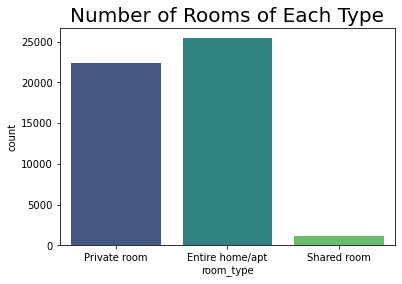

In [141]:
sns.countplot(x='room_type',data=nyc_df,palette='viridis')
plt.title("Number of Rooms of Each Type",fontsize=20)

The majority of the listings are Entire home/apts or Private rooms.

## Month

Text(0.5, 1.0, 'Airbnb Listings Each Month')

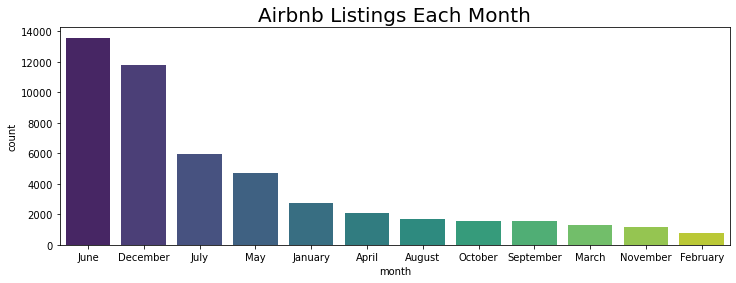

In [142]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# We use order = nyc_df['Month'].value_counts().index to help us sort the count plot by the value counts

sns.countplot(x='month',data=nyc_df,order = nyc_df['month'].value_counts().index,palette='viridis')
plt.title("Airbnb Listings Each Month",fontsize=20)

- The majority of reviews are left in the month of <b>June</b> which indicates that the majority of customers used a rental in June. 
- Meanwhile, the least reviews are left in <b>February</b>, which indicates that the fewest of customers used a rental in February.

## Availability

In [143]:
nyc_df['availability_365'].mean()

112.80142453641164

On average, any given listing is available <b>113 days</b> in a year.

In [144]:
# Identifying the average availability for each neighbourhood group (rounded to 2 decimal places)
nbhd_group = nyc_df.groupby('neighbourhood_group')['availability_365'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd_group = nbhd_group.to_frame()

#Renaming columns
nbhd_group.rename(columns={'availability_365': 'average_availability'}, inplace=True)

# Identifying the average price for each neighbourhood group (rounded to 2 decimal places)
nbhd_group['average_price'] = nyc_df.groupby('neighbourhood_group')['price'].mean().round()

# Identifying the average number of reviews per listing for each neighbourhood group (rounded to 2 decimal places)
nbhd_group['average_number_of_reviews_per_listing'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].mean().round()

# Identifying the total number of reviews for each neighbourhood group(rounded to 2 decimal places)
nbhd_group['total_number_of_reviews'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

nbhd_group.sort_values(by=['average_availability'])

,average_availability,average_price,average_number_of_reviews_per_listing,total_number_of_reviews
neighbourhood_group,,,,
Brooklyn,100.24,124.0,24.0,486174
Manhattan,112.01,197.0,21.0,454126
Queens,144.49,100.0,28.0,156902
Bronx,165.70,87.0,26.0,28334
Staten Island,199.68,115.0,31.0,11541


On average, 
- Listings in <b>Staten Island</b> have the greatest availability and receive the most reviews per listing. 
    - However, Staten Island also receives the least number of reviews overall.
- Listings in <b>Manhattan</b> have the least availability and receive the least reviews per listing. 
    - However, Manhattan receives the second highest number of reviews overall.

### Duration of Stay

In [145]:
nyc_df['minimum_nights'].mean()

7.012444226124688

Average duration of stay for all listings is <b>7 days.</b>

In [146]:
nyc_df.groupby('neighbourhood')['minimum_nights'].mean().sort_values()

neighbourhood
Breezy Point                   1.000000
New Dorp                       1.000000
Oakwood                        1.200000
East Morrisania                1.400000
Woodlawn                       1.454545
                                ...    
Bay Terrace, Staten Island    16.500000
Vinegar Hill                  18.352941
Olinville                     23.500000
North Riverdale               41.400000
Spuyten Duyvil                48.250000
Name: minimum_nights, Length: 221, dtype: float64

Listings in the <b>Spuyten Duyvil</b> neighbourhood offer the longest average duration of stay at approximately <b>48 days.</b>

In [147]:
nyc_df.groupby('neighbourhood_group')['minimum_nights'].mean()

neighbourhood_group
Bronx            4.564738
Brooklyn         6.057693
Manhattan        8.538188
Queens           5.182910
Staten Island    4.831099
Name: minimum_nights, dtype: float64

Listings in the <b>Manhattan</b> neighbourhood group offer the longest average duration of stay at approximately <b>9 days.</b>

## Distance to Major Attractions

In [148]:
nyc_df['distance_to_major_attractions'].mean()

3.0813486020713086

On average, any given listing is <b>3.1 miles</b> from the closest major attraction.

In [149]:
# Identifying the average distance to the closest major attraction for each neighbourhood group (rounded to 2 decimal places)
nbhd_group = nyc_df.groupby('neighbourhood_group')['distance_to_major_attractions'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd_group = nbhd_group.to_frame()

#Renaming columns
nbhd_group.rename(columns={'distance_to_major_attractions': 'average_distance_to_major_attractions'}, inplace=True)

# Identifying the average price for each neighbourhood group (rounded to 2 decimal places)
nbhd_group['average_price'] = nyc_df.groupby('neighbourhood_group')['price'].mean().round()

# Identifying the average number of reviews for each neighbourhood group (rounded to 2 decimal places)
nbhd_group['average_number_of_reviews_per_listing'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].mean().round()

# Identifying the total number of reviews per listing for each neighbourhood group(rounded to 2 decimal places)
nbhd_group['total_number_of_reviews'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

nbhd_group.sort_values(by=['average_distance_to_major_attractions'])

,average_distance_to_major_attractions,average_price,average_number_of_reviews_per_listing,total_number_of_reviews
neighbourhood_group,,,,
Bronx,2.42,87.0,26.0,28334
Manhattan,2.56,197.0,21.0,454126
Staten Island,3.12,115.0,31.0,11541
Brooklyn,3.37,124.0,24.0,486174
Queens,4.19,100.0,28.0,156902


On average, 
- Listings in the <b>Bronx</b> are the closest a major attraction in the city. 
    - However, the Bronx also has the second lowest number of listings.
- Listings in <b>Queens</b> have the least availability and receive the least reviews per listing. 
- <b>Manhattan</b> has the greatest number of listings and they are second closest to  a major attraction in the city. 

## Price

### Average Price Across all listings

In [150]:
avg_all_listings = round(nyc_df['price'].mean(),2)
avg_all_listings

152.74

### Price and Reviews Per Month

Text(0.5, 1.0, 'Reviews per Month vs. Price')

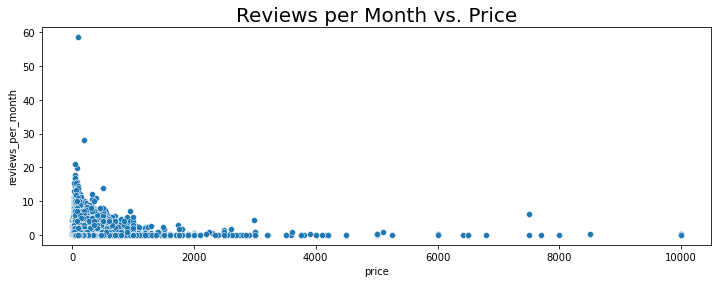

In [151]:
afig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='reviews_per_month',x='price', data=nyc_df)
plt.title("Reviews per Month vs. Price",fontsize=20)

Text(0.5, 1.0, 'Number of Reviews vs. Price')

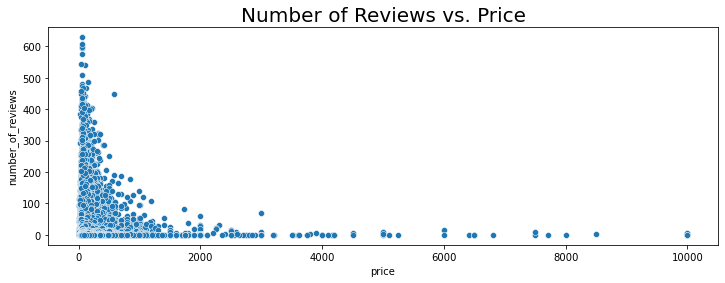

In [152]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='number_of_reviews',x='price', data=nyc_df)
plt.title("Number of Reviews vs. Price",fontsize=20)

Based on the plot we can see that the majority of more expensive listings receive fewers reviews as compared to less expensive ones. 

### Average Price by Neighbourhood

In [153]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
nbhd = nyc_df.groupby('neighbourhood')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd = nbhd.to_frame()

#Renaming columns
nbhd.rename(columns={'price': 'average_price'}, inplace=True)

# Identifying the average number of reviews for each neighbourhood (rounded to 2 decimal places)
nbhd['average_number_of_reviews'] = nyc_df.groupby('neighbourhood')['number_of_reviews'].mean().round()

nbhd.head()

,average_price,average_number_of_reviews
neighbourhood,,
Allerton,87.60,43.0
Arden Heights,67.25,8.0
Arrochar,115.00,15.0
Arverne,171.78,29.0
Astoria,117.19,21.0


Text(0.5, 1.0, 'Number of Reviews vs. Price: Aggregated by Neighbourhood')

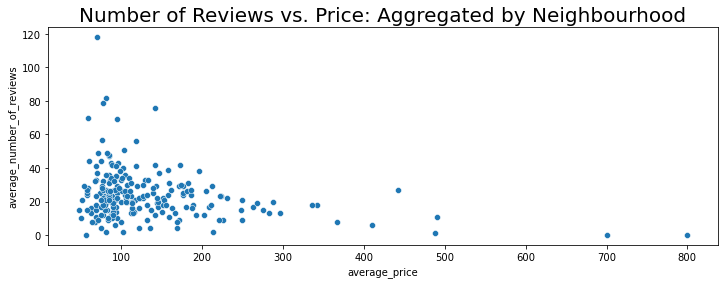

In [154]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='average_number_of_reviews',x='average_price', data=nbhd)
plt.title("Number of Reviews vs. Price: Aggregated by Neighbourhood",fontsize=20)

We see that once the data is aggregated by neighbourhood averages, there is still a larger number of reviews left for the less expensive listings as compared to the more expensive ones.

### Neighbourhoods with Listings Above Average Price

In [155]:
nbhd[nbhd['average_price']>avg_all_listings].count()

average_price                55
average_number_of_reviews    55
dtype: int64

There are <b>55</b> neighbourhoods with average listing price above the average for all listings.

### Neighbourhoods with Listings Below Average Price

In [156]:
nbhd[nbhd['average_price']<avg_all_listings].count()

average_price                166
average_number_of_reviews    166
dtype: int64

There are <b>166</b> neighbourhoods with average listing price below the average for all listings.

### Price in Each Neighbourhood Group

In [157]:
nyc_df.groupby('neighbourhood_group')['price'].std()

neighbourhood_group
Bronx            106.798933
Brooklyn         186.936694
Manhattan        291.489822
Queens           167.128794
Staten Island    277.620403
Name: price, dtype: float64

Largest standard deviation in price is in <b>Manhattan</b>.

Text(0.5, 1.0, 'Listing Price by Neighbourhood Group')

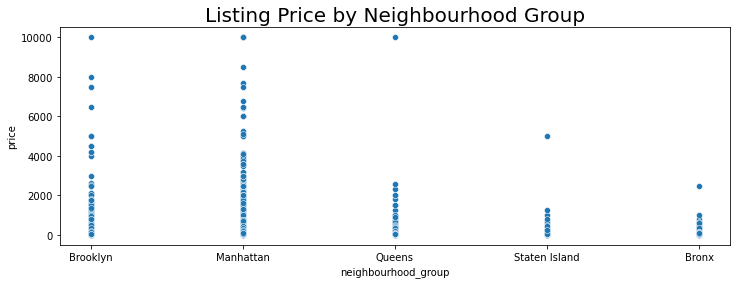

In [158]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='price',x='neighbourhood_group', data=nyc_df)
plt.title("Listing Price by Neighbourhood Group",fontsize=20)

The spread of prices is greatest in <b>Manhattan.</b>

### Average Price, Total Number of Reviews and Number of Listings by Neighbourhood Group

In [159]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
nbhd_group = nyc_df.groupby('neighbourhood_group')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd_group = nbhd_group.to_frame()

#Renaming columns
nbhd_group.rename(columns={'price': 'average_price'}, inplace=True)

# Identifying the average number of reviews for each neighbourhood group(rounded to 2 decimal places)
nbhd_group['total_number_of_reviews'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

nbhd_group['number_of_listings'] = nyc_df['neighbourhood_group'].value_counts()

#Ratio of reviews as compared to total number of listings for each neighbourhood group
nbhd_group['ratio'] = (nbhd_group['total_number_of_reviews']/nbhd_group['number_of_listings']).round(2)


nbhd_group.head()

,average_price,total_number_of_reviews,number_of_listings,ratio
neighbourhood_group,,,,
Bronx,87.47,28334,1089,26.02
Brooklyn,124.41,486174,20089,24.20
Manhattan,196.90,454126,21643,20.98
Queens,99.54,156902,5664,27.70
Staten Island,114.81,11541,373,30.94


We notice something interesting in the data here:

- Staten island has the largest number of reviews as compared to the actual number of listings, which indicates that reviews were left more frequently for stays in listings that were within the Staten island neighbourhood group.
- Manhattan has the second largest number of listings but has the least number of reviews compared to the actual number of listings, which indicates that reviews are left less frequently for stays in the Manhattan neighbourhood group. The possible reasons for this are as follows:

    - The average listing price is also the highest of all neighbourhood groups.
    - Manhattan's average listing price is also above the average for all listings.


### Average Price by Room Type

In [160]:
room_type = nyc_df.groupby('room_type')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
room_type = room_type.to_frame()

#Renaming columns
room_type.rename(columns={'price': 'average_price'}, inplace=True)

# Identifying the average number of reviews for each neighbourhood (rounded to 2 decimal places)
room_type['total_number_of_reviews'] = nyc_df.groupby('room_type')['number_of_reviews'].sum().round()

room_type

,average_price,total_number_of_reviews
room_type,,
Entire home/apt,211.81,579856
Private room,89.79,537965
Shared room,70.08,19256


As expected, listings with Entire home/apt are the most expensive.

### Number of Reviews vs. Price for Each Room Type

Text(0.5, 0.98, 'Number of Reviews vs. Price for Each Room Type')

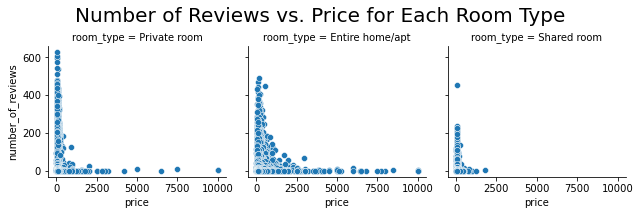

In [161]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(nyc_df, col ='room_type')

# map the above form facetgrid with some attributes
graph.map(sns.scatterplot, "price","number_of_reviews")

#Setting the title for the FacetGrid 
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle('Number of Reviews vs. Price for Each Room Type', fontsize=20)

There are more reviews for less expensive listings regardless of the room types.

# Summary of Data

#### Availability
- There are 48858 listings in total.
- The majority of the listings are Entire home/apts or Private rooms.

- On average, any given listing is available <b>113 days</b> in a year.
    - Listings in <b>Staten Island</b> have the greatest availability and receive the most reviews per listing. 
    - However, Staten Island also receives the least number of reviews overall.
    - Listings in <b>Manhattan</b> have the least availability and receive the least reviews per listing. 
    - However, Manhattan receives the second highest number of reviews overall.
    
- Average duration of stay for all listings is 7 days.
    - Listings in the <b>Spuyten Duyvil</b> neighbourhood offer the longest average duration of stay at approximately <b>48 days.</b>
    - Listings in the <b>Manhattan</b> neighbourhood group offer the longest average duration of stay at approximately <b>9 days.</b>

#### Location
 
- There are <b>221</b> neighbourhoods with <b>Williamsburg</b> having the most listings (3917). 
- The top 10 neighbourhoods represent about <b>47.95%</b> of all listings.
- There are <b>5</b> neighbourhood groups with <b>Manhattan</b> having the most listings (21643). 

- On average, any given listing is <b>3.1 miles</b> from the closest major attraction.
    - Listings in the <b>Bronx</b> are the closest a major attraction in the city. 
    - However, the Bronx also has the second lowest number of listings.
    - Listings in <b>Queens</b> have the least availability and receive the least reviews per listing. 
    - <b>Manhattan</b> has the greatest number of listings and they are second closest to  a major attraction in the city. 

#### Price 

- Average Price Across all listings: 152.74
- There are <b>55</b> neighbourhoods with average listing price above the average for all listings.
- There are <b>166</b> neighbourhoods with average listing price below the average for all listings.
- Largest standard deviation in price is in <b>Manhattan</b>.
- The spread of prices is greatest in <b>Manhattan.</b>
- As expected, listings with Entire home/apt are the most expensive.

#### Number of Reviews

- Across all categories (Room Type, Neighbourhood etc.), less expensive Listings receive more reviews. 
- The majority of reviews are left in the month of <b>June</b> which indicates that the majority of customers used a rental in June. Meanwhile, the least reviews are left in <b>February</b>, which indicates that the  fewest customers used a rental in February.
- Staten Island has the largest number of reviews as compared to the actual number of listings, which indicates that reviews were left more frequently for stays in listings that were within the Staten island neighbourhood group.
- Manhattan has the second largest number of listings but has the least number of reviews compared to the actual number of listings, which indicates that reviews are left less frequently for stays in the Manhattan neighbourhood group. The possible reasons for this are as follows:

    - The average listing price is also the highest of all neighbourhood groups.
    - Manhattan's average listing price is also above the average for all listings.

<b>Additional Data necessary</b><br>
The data only tells us if a review was left or not for any given listing. It would be beneficial to know what score each listing received when they were reviewed. We can only go off the number of reviews listings receive and assume listings (and by extension neighbourhoods and neighbourhood groups) with more reviews are preferable.

# Exporting the data

In [163]:
#Exporting the dataset (without the index values)
#nyc_df.to_csv('Airbnb.csv', index=False)